Una de las enfermedades que más preocupa a las autoridades sanitarias es 
la hipertensión. La hipertensión arterial afecta más del 30% de la población 
adulta mundial y es el principal factor de riesgo de padecer enfermedades 
cardiovasculares. Por ello, la lucha contra esta enfermedad es objetivo de 
los sistemas sanitarios de todo el mundo. 
En un laboratorio europeo se está trabajando en un medicamento innovador 
con cierta composición de etanol para reducir la presión arterial alta 
(sistólica). El medicamento se suministra a 100 pacientes de diferentes 
edades por vía oral en forma de comprimido. Para obtener mejores 
conclusiones en el estudio, se divide a las 100 personas en dos grupos, grupo 
1 (pacientes con edad igual o inferior a 35 años) y grupo 2 (pacientes con 
edad superior a 35 años). En la hoja de cálculo Excel llamada “HIPERTENSIÓN 
“aparecen los datos de las 100 personas que se han empleado en el estudio. 
En la primera columna aparece la edad del paciente, en la segunda columna 
aparece la presión sistólica antes de la ingestión del medicamento y en la 
tercera columna aparece indicado el valor de la presión sistólica 60 minutos 
después de la toma del medicamento. Los 40 primeros datos corresponden a 
pacientes del primer grupo y los 60 restantes a pacientes del segundo grupo. 
También se incluye una última columna donde figura el valor del colesterol 
total del paciente.
A partir de los datos que aparecen en la hoja de cálculo, se pide contestar a 
las siguientes cuestiones:

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import linear_model

In [4]:
df = pd.read_excel("HIPERTENSION.xlsx").set_index('Grupo')
df

,Edad,Presion sistólica antes,Presión sistólica después,Colesterol total
Grupo,,,,
1,30,126,118,191
1,25,114,110,174
1,27,110,110,175
1,34,108,105,173
1,35,131,132,200
...,...,...,...,...
2,54,117,100,194
2,50,148,141,239
2,54,121,115,196


### Ejercicio 1

a) Obtener, usando algún programa estadístico, las medidas de
centralización y dispersión para cada uno de los dos grupos de control de
la variable (grupo 1 y grupo 2) que mide la presión sistólica antes de la 
toma del medicamento e indica si la media en cada uno de estos grupos 
puede considerarse representativa a partir de los datos obtenidos.

In [5]:
#Primero vamos a crear nuestros grupos
grupo1 = df.loc[1]
grupo2 = df.loc[2]


In [6]:
#Vamos a ver las medidas de centralización y dispersión 
varianza_grupo1 = grupo1['Presion sistólica antes'].var()
varianza_grupo1=round(varianza_grupo1,2)

moda_grupo1 = grupo1['Presion sistólica antes'].mode().values[0:]

rango_grupo1 = grupo1['Presion sistólica antes'].max() - grupo1[
    'Presion sistólica antes'].min()
 
stats_grupo1 = grupo1['Presion sistólica antes'].describe().round(2)

q1_grupo1 = stats_grupo1['25%']
q3_grupo1 = stats_grupo1['75%']
iqr_grupo1 = q3_grupo1 - q1_grupo1

stats_grupo1['variance'] = varianza_grupo1
stats_grupo1['mode'] = moda_grupo1
stats_grupo1['range'] = rango_grupo1
stats_grupo1['IQR'] = iqr_grupo1
print(stats_grupo1)



count                       40.0
mean                      123.42
std                         9.03
min                        105.0
25%                        117.5
50%                        124.5
75%                        129.0
max                        142.0
variance                   81.48
mode        [121, 125, 128, 131]
range                         37
IQR                         11.5
Name: Presion sistólica antes, dtype: object


In [7]:
varianza_grupo2 = grupo2['Presion sistólica antes'].var()
varianza_grupo2=round(varianza_grupo2,2)

moda_grupo2 = grupo2['Presion sistólica antes'].mode().values[0:]

rango_grupo2 = grupo2['Presion sistólica antes'].max() - grupo2[
    'Presion sistólica antes'].min()
 
stats_grupo2 = grupo2['Presion sistólica antes'].describe().round(2)

q1_grupo2 = stats_grupo2['25%']
q3_grupo2 = stats_grupo2['75%']
iqr_grupo2 = q3_grupo2 - q1_grupo2

stats_grupo2['variance'] = varianza_grupo2
stats_grupo2['mode'] = moda_grupo2
stats_grupo2['range'] = rango_grupo2
stats_grupo2['IQR'] = iqr_grupo2
print(stats_grupo2)



count         60.0
mean        127.48
std          13.89
min           96.0
25%         118.75
50%          126.0
75%         138.25
max          154.0
variance     192.9
mode         [121]
range           58
IQR           19.5
Name: Presion sistólica antes, dtype: object


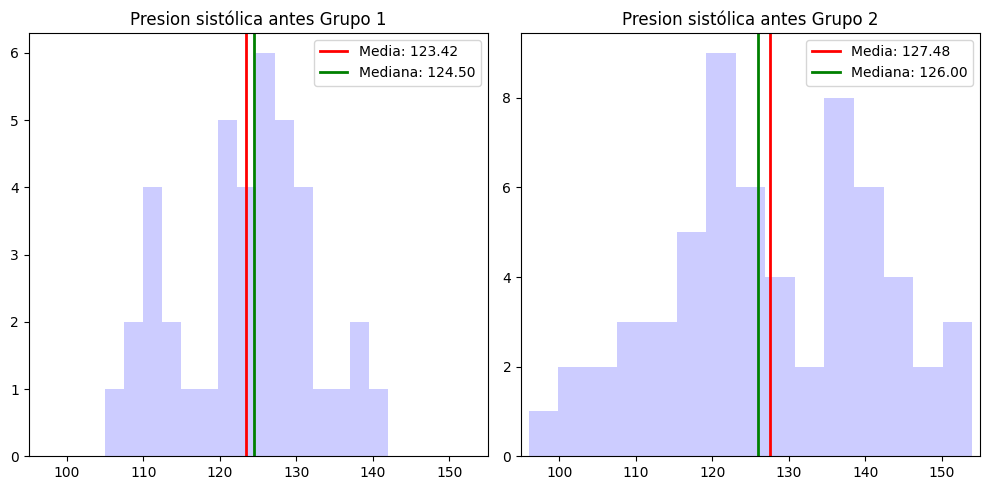

In [8]:
media_grupo1 = grupo1['Presion sistólica antes'].mean()
mediana_grupo1 = grupo1['Presion sistólica antes'].median()

media_grupo2 = grupo2['Presion sistólica antes'].mean()
mediana_grupo2 = grupo2['Presion sistólica antes'].median()

fig, axes = plt.subplots(1,2, figsize=(10,5))
x_axis_limits = [95, 155]

axes[0].hist(grupo1['Presion sistólica antes'], bins=15, alpha=0.2, 
             color='blue')
axes[0].axvline(media_grupo1, color='red', linestyle='solid', linewidth=2, 
                label=f'Media: {media_grupo1:.2f}')
axes[0].axvline(mediana_grupo1, color='green', linestyle='solid', 
                linewidth=2, label=f'Mediana: {mediana_grupo1:.2f}')
axes[0].set_title('Presion sistólica antes Grupo 1')
axes[0].set_xlim(x_axis_limits)
axes[0].legend(loc='upper right')

axes[1].hist(grupo2['Presion sistólica antes'], bins=15, 
             alpha=0.2, color='b')
axes[1].axvline(media_grupo2, color='red', linestyle='solid', 
                linewidth=2, label=f'Media: {media_grupo2:.2f}')
axes[1].axvline(mediana_grupo2, color='green', linestyle='solid', 
                linewidth=2, label=f'Mediana: {mediana_grupo2:.2f}')
axes[1].set_title('Presion sistólica antes Grupo 2')
axes[1].set_xlim(x_axis_limits)
axes[1].legend(loc='upper right')


plt.tight_layout()
plt.show()


In [9]:
#coeficiente de variación
desviacion_grupo1= grupo1['Presion sistólica antes'].std()
media_grupo1 = grupo1['Presion sistólica antes'].mean()
desviacion_grupo2= grupo2['Presion sistólica antes'].std()
media_grupo2 = grupo2['Presion sistólica antes'].mean()

CV_grupo1 = round((desviacion_grupo1/media_grupo1),3)
CV_grupo2 = round((desviacion_grupo2/media_grupo2),3)

print(f'El coeficiente de variación de grupo 1 es {CV_grupo1}')
print(f'El coeficiente de variación de grupo 2 es {CV_grupo2}')

El coeficiente de variación de grupo 1 es 0.073
El coeficiente de variación de grupo 2 es 0.109


En ambos grupos, los coeficientes de variación del 0.7314 y 0.109 se consideran bajos y porque los dos son menores de 0.3 las dos medias se consideran representivas. Estos coeficientes sugieren que los puntos de datos en nuestros dos conjuntos están relativamente cercanos a las medias respectivas. Esto indica un alto grado de consistencia y estabilidad en ambos conjuntos de datos, respaldando la conclusión de que las medias de los dos grupos representan con precisión la tendencia central de los datos. La baja variabilidad en cada caso en relación con las medias sugiere que los puntos de datos individuales no se desvían significativamente del promedio, lo cual refuerza la confiabilidad de la media como medida representativa en ambos grupos.

b) Estudiar la simetría y la curtosis del nivel de presión sistólica en los 
pacientes del segundo grupo para cada una de las mediciones de la
hipertensión que aparecen en la tabla.

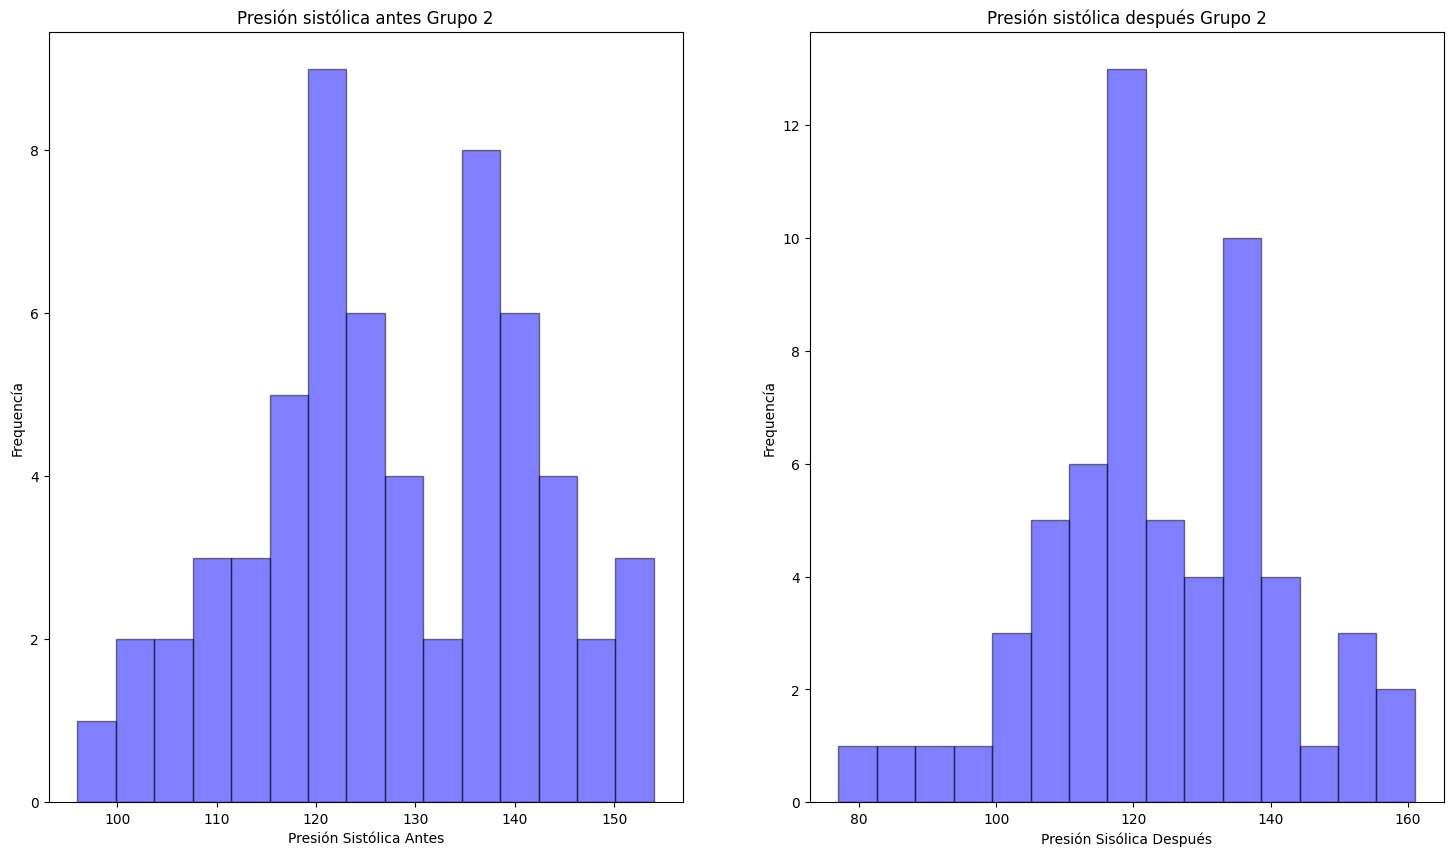

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(18,10))

axes[0].hist(grupo2['Presion sistólica antes'], bins=15, 
             alpha=0.5, color='b', edgecolor='black')
axes[0].set_title('Presión sistólica antes Grupo 2')
axes[0].set_xlabel('Presión Sistólica Antes')
axes[0].set_ylabel('Frequencía')

axes[1].hist(grupo2['Presión sistólica después'], bins=15, 
             alpha=0.5, color='b', edgecolor='black')
axes[1].set_title('Presión sistólica después Grupo 2')
axes[1].set_xlabel('Presión Sisólica Después')
axes[1].set_ylabel('Frequencía');



In [11]:
asimetria_antes = grupo2['Presion sistólica antes'].skew().round(2)
asimetria_despues = grupo2['Presión sistólica después'].skew().round(2)

print(f'El coefficiente para la distribución de personas con edad más de 35 años \npara presión sistólica antes del medicamento es {asimetria_antes} que es menor que cero.')
print('La distribución es asimétrica negativa o asimétrica a la izquierda')

print(f'\nEl coefficiente para la distribución de personas con edad más de 35 años \npara presión sistólica después del medicamento es {asimetria_despues} que es menor que cero.')
print('La distribución es asimétrica negativa o asimétrica a la izquierda')

El coefficiente para la distribución de personas con edad más de 35 años 
para presión sistólica antes del medicamento es -0.14 que es menor que cero.
La distribución es asimétrica negativa o asimétrica a la izquierda

El coefficiente para la distribución de personas con edad más de 35 años 
para presión sistólica después del medicamento es -0.19 que es menor que cero.
La distribución es asimétrica negativa o asimétrica a la izquierda


En ambos casos, el coeficiente es negativo pero muy cercano a cero. Por lo tanto, en ambos grupos, la distribución es ligeramente asimétrica.

In [12]:
curtosis_antes = grupo2['Presion sistólica antes'].kurt().round(2)
curtosis_despues = grupo2['Presión sistólica después'].kurt().round(2)

print(f'El coefficiente de curtosis para la distribución de personas con edad más de 35 años \npara presión sistólica antes del medicamento es {curtosis_antes} que es menor que cero.')
print('La distribución es Leptocúrtica')

print(f'\nEl coefficiente para la distribución de personas con edad más de 35 años \npara presión sistólica después del medicamento es {curtosis_despues} que es mayor que cero.')
print('La distribución es Platicúrtica')


El coefficiente de curtosis para la distribución de personas con edad más de 35 años 
para presión sistólica antes del medicamento es -0.6 que es menor que cero.
La distribución es Leptocúrtica

El coefficiente para la distribución de personas con edad más de 35 años 
para presión sistólica después del medicamento es 0.37 que es mayor que cero.
La distribución es Platicúrtica


c) Indicar para cada una de las variables relacionadas con la medición 
de la presión sistólica que aparecen en el fichero el valor de los cuartiles 
y su significado y obtener el box- plot ( diagrama de cajas) 
correspondiente. Estudiar la presencia de valores atípicos

In [13]:
q1_antes = np.percentile(df['Presion sistólica antes'], 25)
mediana_antes = np.percentile(df['Presion sistólica antes'],50)
q3_antes = np.percentile(df['Presion sistólica antes'], 75)

q1_despues = np.percentile(df['Presión sistólica después'], 25)
mediana_despues = np.percentile(df['Presión sistólica después'],50)
q3_despues = np.percentile(df['Presión sistólica después'], 75)


In [14]:
print(f"Q1 Presion Sistólica Antes: {q1_antes}\nMediana Presion Sistólica Antes: {mediana_antes}\nQ3 Presion Sistólica Antes: {q3_antes}\n")
print(f"Q1 Presion Sistólica Después: {q1_despues}\nMediana Presion Sistólica Después: {mediana_despues}\nQ3 Presion Sistólica Después: {q3_despues}")


Q1 Presion Sistólica Antes: 118.0
Mediana Presion Sistólica Antes: 125.0
Q3 Presion Sistólica Antes: 135.0

Q1 Presion Sistólica Después: 115.0
Mediana Presion Sistólica Después: 120.0
Q3 Presion Sistólica Después: 131.25


El primer cuartil, Q1, es el valor por debajo del cual cae el 25% de los datos. El tercer cuartil, Q3, es el valor por debajo del cual cae el 75% de los datos. Imagina organizar tu conjunto de datos en orden ascendente. Q1 es el valor en el percentil 25, dividiendo el 25% más bajo de los datos del resto. Q3 es el valor en el percentil 75, dividiendo el 75% más bajo de los datos del 25% más alto. Q3 - Q1 = IQR o el rango intercuartílico que proporciona información sobre la dispersión de los datos. El rango intercuartilíco nos ayuda identificar outliers. Los valores que son mayores que Q3 + 1.5 * IQR o menores que Q1 - 1.5 * IQR se consideran outliers.
En el caso de nuestros datos de Presión Sistólica Antes y Después, los primeros cuartiles y tercer cuartiles son similares: 118 y 135 para Presión Sistólica Antes y 115 y 131.25 para Presión Sistólica Después. Del mismo modo, los rangos intercuartílicos son similares; 17 para Presion Sisólica Antes y 16.25 para Presion Sistólica Después. Estas medidas indican que ambos casos tienen una dispersión de datos muy similar aunque tengan medias distintas.

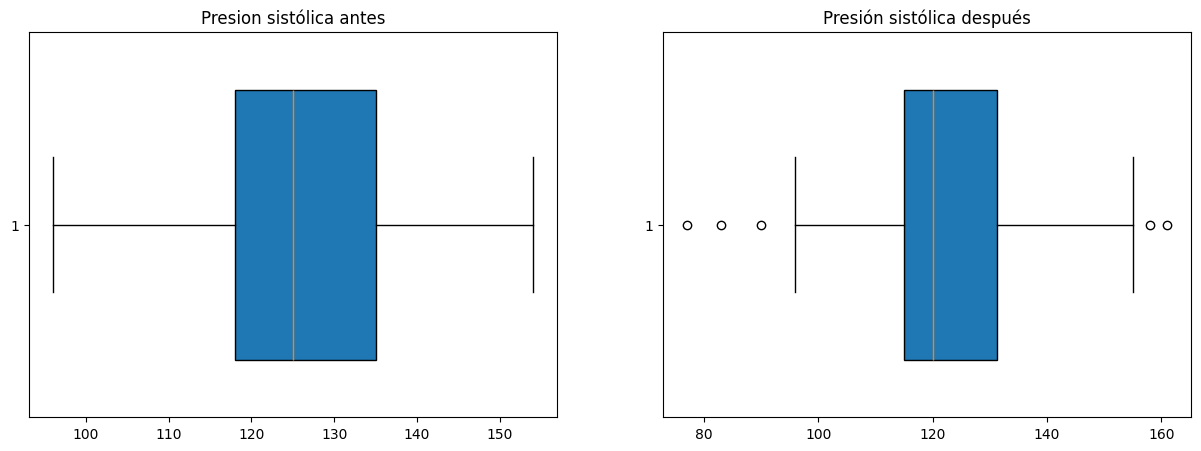

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

axes[0].boxplot(df['Presion sistólica antes'], 
                vert=False, widths=0.7, patch_artist=True)
axes[0].set_title('Presion sistólica antes')

axes[1].boxplot(df['Presión sistólica después'], 
                vert=False, widths=0.7, patch_artist=True)
axes[1].set_title('Presión sistólica después');


In [16]:
def busca_outliers(data_series):
    Q1 = data_series.quantile(0.25)
    Q3 = data_series.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data_series[(data_series < lower_bound) | 
                           (data_series > upper_bound)]

    if outliers.empty:
        return None  
    else:
        return outliers


In [17]:
outliers_antes = busca_outliers(df['Presion sistólica antes'])
if outliers_antes is None:
    print("La distibución de Presion sistólica antes no contiene outliers")
else:
    print('Outliers:')
    print(outliers_antes)

La distibución de Presion sistólica antes no contiene outliers


In [18]:
outliers_despues = busca_outliers(df['Presión sistólica después'])
if outliers_despues is None:
    print("La distibución de Presión sistólica después no contiene outliers")
else:
    print('Outliers:')
    print(outliers_despues)

Outliers:
Grupo
2    158
2    161
2     83
2     90
2     77
Name: Presión sistólica después, dtype: int64


Los box-plots son muy útiles para visualizar la dispersión de datos e identificar outliers. En un box-plot, la línea que pasa verticalmente a través de la caja indica la mediana, el lado izquierdo de la caja indica Q1 y el lado derecho indica Q3. El bigote del lado izquierdo indica Q1 - 1.5 * IQR y el bigote del lado derecho indica Q3 + 1.5 * IQR. Como hemos dicho antes, los outliers son valores que son menores que Q1 - 1.5 * IQR o mayores que Q3 + 1.5 * IQR. Visualmente aparecen en nuestros box-plots como puntos a la derecha del bigote derecho o al izquierda del bigote izquierdo. En los dos box-plots anteriores no aparecen outliers en el box-plot de Presion sistólica antes pero aparecen cinco outliers en el plot de Presion sistólica después: tres en el lado izquierdo y dos en el lado derecho. 
Cuando calculamos los valores de los bigotes en cada gráfico que son como límites inferiores y superiores obtenemos límites del 92.5 y 160.5 para Presion sistólica antes y 90.625 y 155.625 para Presion sistólica después. Usando estos límites podemos ver que no hay outliers en Presion sistólica antes pero los valores 158, 161, 83, 90 y 77 se consideran outliers en Presion sistólica después porque son mayores que el límite superior 155.625 o menores que el límite inferior 90.625.


d) Estudiar la normalidad de los datos de las variables relacionadas con 
la medición de la presión sistólica.

In [19]:
from scipy.stats import probplot
from scipy.stats import shapiro


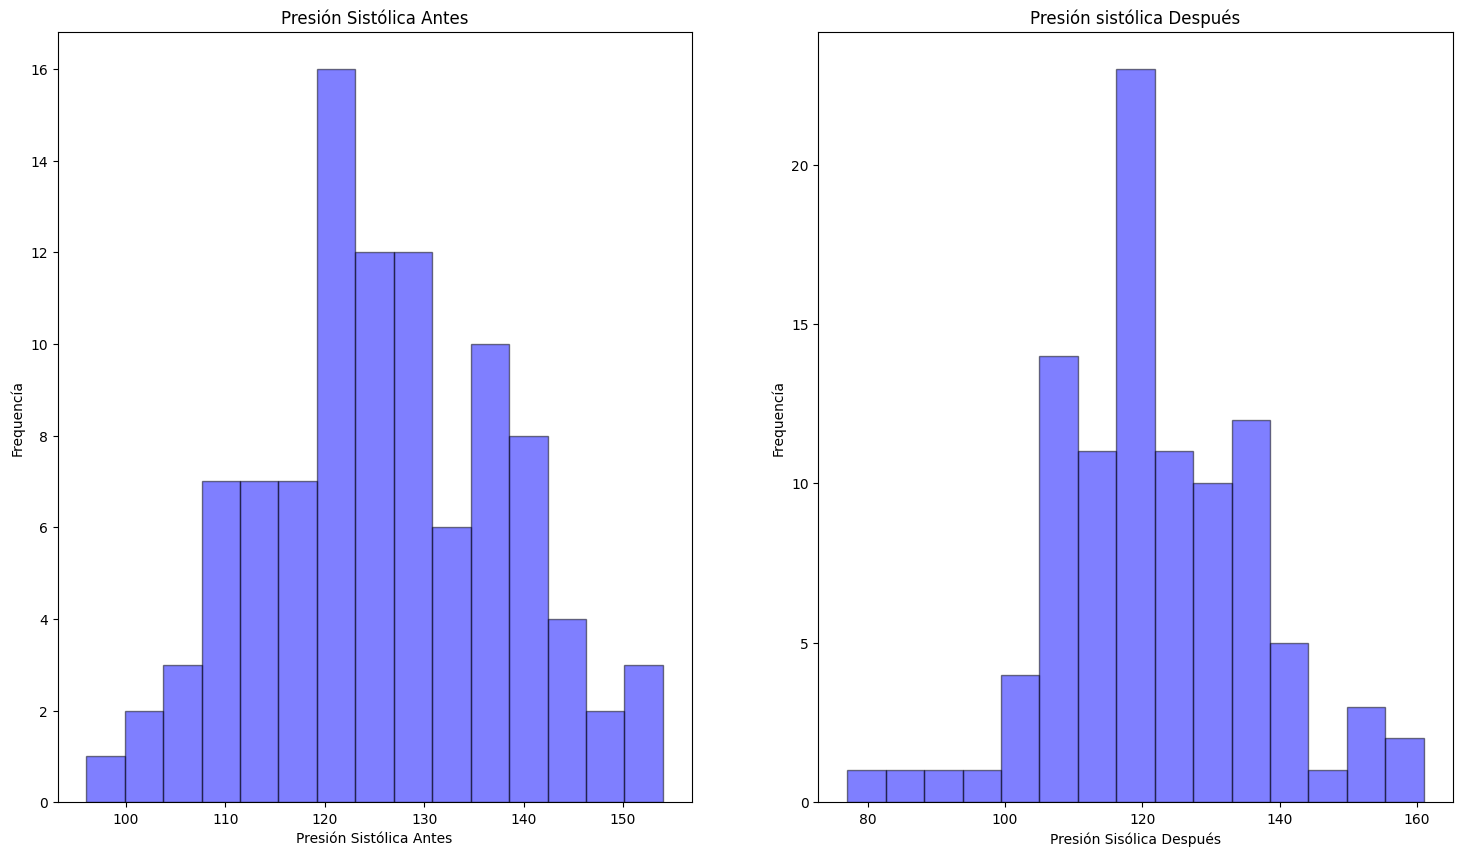

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(18,10))

axes[0].hist(df['Presion sistólica antes'], bins=15, 
             alpha=0.5, color='b', edgecolor='black')
axes[0].set_title('Presión Sistólica Antes')
axes[0].set_xlabel('Presión Sistólica Antes')
axes[0].set_ylabel('Frequencía')

axes[1].hist(df['Presión sistólica después'], bins=15, 
             alpha=0.5, color='b', edgecolor='black')
axes[1].set_title('Presión sistólica Después')
axes[1].set_xlabel('Presión Sisólica Después')
axes[1].set_ylabel('Frequencía');

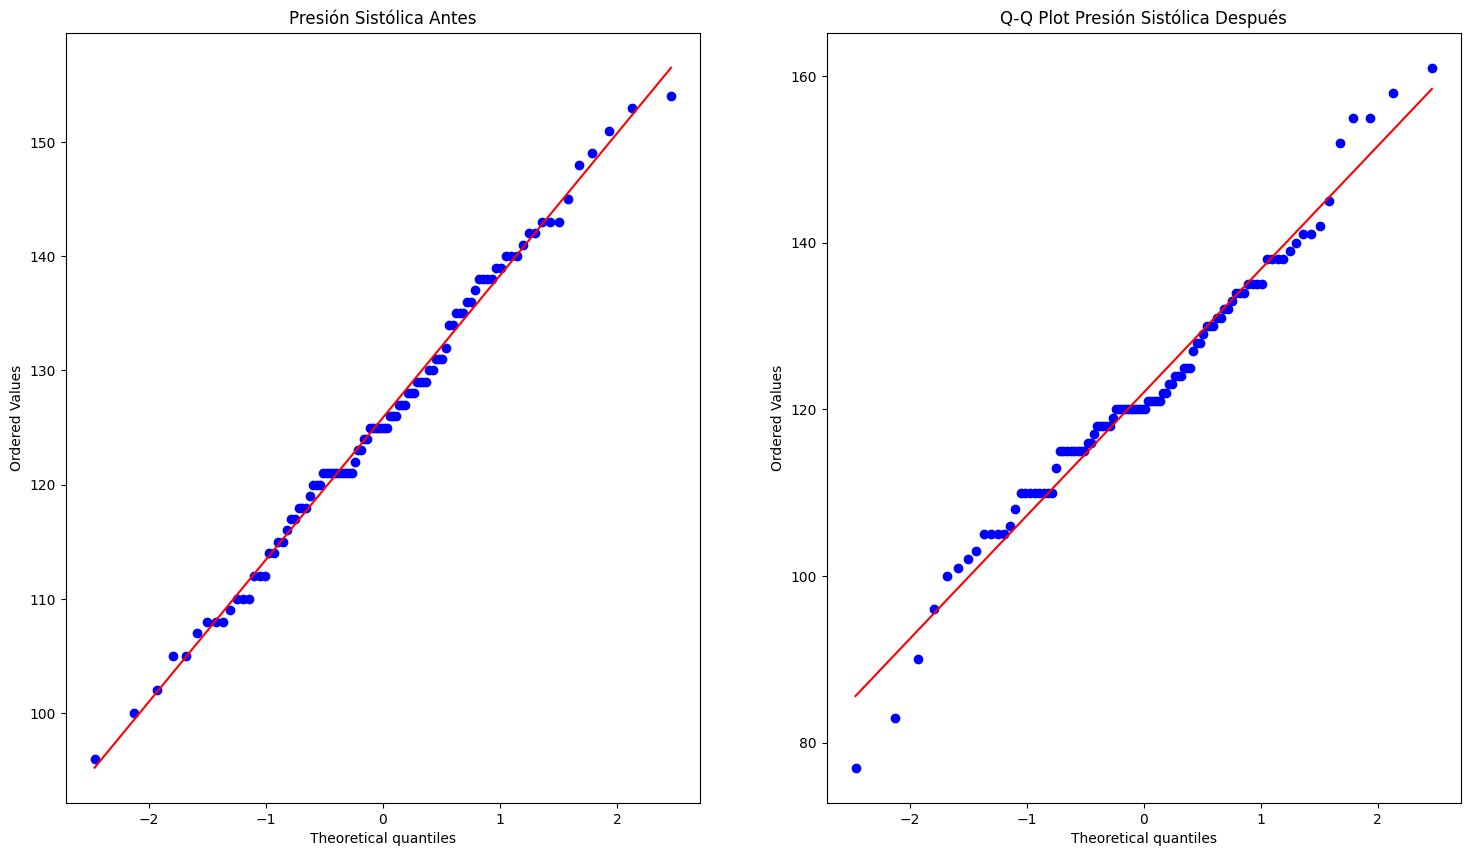

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(18,10))

probplot(df['Presion sistólica antes'], plot=axes[0])
axes[0].set_title('Presión Sistólica Antes')


probplot(df['Presión sistólica después'], plot=axes[1])
axes[1].set_title('Q-Q Plot Presión Sistólica Después');


In [22]:
#Shapiro-Wilk Test para Presion Sistólica Antes 
statistic, p_value = shapiro(df['Presion sistólica antes'])

print(f'Statistic: {statistic}, p-value: {p_value}')

if p_value > 0.05:
    print('Porque nuestro p-valor > 0.05, los datos de Presion sistólica antes parecen tener una distribución normal.')
else:
    print('Porque nuestro p-valor < 0.05, los datos de Presion sistólica antes no parecen tener una distribución normal.')

Statistic: 0.9919236302375793, p-value: 0.8156657218933105
Porque nuestro p-valor > 0.05, los datos de Presion sistólica antes parecen tener una distribución normal.


In [23]:
#Shapiro-Wilk Test para Presion Sistólica Después 
statistic, p_value = shapiro(df['Presión sistólica después'])

print(f'Statistic: {statistic}, p-value: {p_value}')

if p_value > 0.05:
    print('Porque nuestro p-valor > 0.05, los datos de Presion Sistólica Después parecen tener una distribución normal.')
else:
    print('Porque nuestro p-valor < 0.05, los datos de Presion Sistólica Después no parecen tener una distribución normal.')

Statistic: 0.9788827300071716, p-value: 0.1087479442358017
Porque nuestro p-valor > 0.05, los datos de Presion Sistólica Después parecen tener una distribución normal.


In [24]:
import numpy as np
from scipy.stats import kstest, norm
import matplotlib.pyplot as plt

#Kolmogorov-Smirnoff Prueba para Normalidad para Presion Sistólica Antes
antes_z=stats.zscore(df['Presion sistólica antes'])
ks_statistic, ks_p_value = kstest(antes_z, 'norm')

print(f'KS Statistic: {ks_statistic}')
print(f'P-value: {ks_p_value}')

if ks_p_value < 0.05:
    print("Rechazamos la hipótesis nula con nivel de significación del 5%. \nLa muestra no proviene de una distribución normal.")
else:
    print("No se puede rechazar la hipótesis nula con nivel de significación del 5%. \nLa muestra puede provenir de una distribución normal.")

KS Statistic: 0.05447357159932309
P-value: 0.9121294848003734
No se puede rechazar la hipótesis nula con nivel de significación del 5%. 
La muestra puede provenir de una distribución normal.


In [25]:
#Kolmogorov-Smirnoff Prueba para Normalidad para Presion Sistólica Después 

despues_z=stats.zscore(df['Presión sistólica después'])

ks_statistic, ks_p_value = kstest(despues_z, 'norm')

print(f'KS Statistic: {ks_statistic}')
print(f'P-value: {ks_p_value}')

if ks_p_value < 0.05:
    print("Rechazamos la hipótesis nula con nivel de significación del 5%. \nLa muestra no proviene de una distribución normal.")
else:
    print("No se puede rechazar la hipótesis nula con nivel de significación del 5%. \nLa muestra puede provenir de una distribución normal.")


KS Statistic: 0.0879665027985988
P-value: 0.3983999727322528
No se puede rechazar la hipótesis nula con nivel de significación del 5%. 
La muestra puede provenir de una distribución normal.


Para ver si nuestras muestras datos para Presion sistólica antes y Presion sistólica después tienen una distribución normal vamos a empezar visualizando los datos en un histograma. En los histogramas de Presion sistólica antes y Presion sistólica después, las distribuciónes de los datos parecen más o menos normal pero es difícil estar seguro que son normal con solo un histograma. Vamos a seguir y crear un Q-Q plot que es otra forma de visualizar si las distribuciones son normales. En ambos casos aquí las distibuciones parecen ser normales pero es necesario llevar a cabo algunas pruebas de normalidad. Vamos a empezar con la prueba de Shapiro-Wilk que es una prueba estadística utilizada para evaluar si una muestra proviene de una población distribuida normalmente. En Shapiro-Wilk, la hipótesis nula es que la población sigue una distribución normal. La hipótesis alternativa es que la población no sigue una distribución normal. En los dos casos de Presion sistólica antes y Presion sistólica después, usando un nivel de significación = 0.05, obtenemos p-valores que son mayores que este nivel. Por lo tanto, en ambos casos, no podemos rechazar la hipótesis nula con este nivel de significación y nuestras muestras puede provenir de una distribución normal. También, vamos a usar la prueba de Kolmogorov-Smirnov que es útil para verificar si los datos de una muestra coinciden con una distribución conocida. En nuestro caso, la hipótesis nula para nuestras dos muestras asume que las muestras siguen una distribución normal y la hipótesis alternativa sugiere que la muestra no sigue una distribución normal. Usando un nivel de significación del 5%, obtenemos p-valores que no nos permiten rechazar la hipótesis nula con este nivel. Por lo tanto, ambos muestras pueden provenir de unas distribuciónes normales.
Con las dos formas que hemos usado para visualizar las distribuciones de datos de Presion sistólica antes y Presion sistólica después y las dos pruebas que hemos llevado a cabo, con los resultados que hemos obtenido, podemos concluir que las distribuciones son normales. 

### Ejercicio 2

Con los datos del fichero anterior, se quiere estudiar la relación existente 
entre la presión sistólica después de la toma del medicamento y el 
colesterol total del paciente en los pacientes jóvenes ( grupo 1)

a)Estudiar la relación lineal existente entre estas dos variables de
estudio.

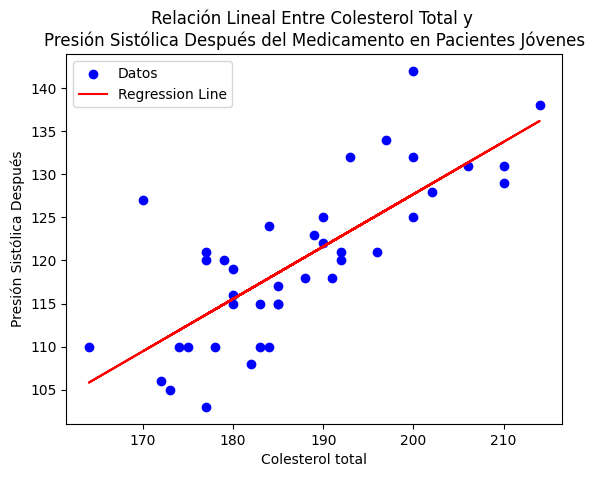

In [26]:
from scipy.stats import linregress
correlation_coefficient = grupo1['Colesterol total'].corr(
    grupo1['Presión sistólica después'])
slope, intercept, r_value, p_value, std_err = linregress(
    grupo1['Colesterol total'], grupo1['Presión sistólica después'])

plt.scatter(grupo1['Colesterol total'], grupo1['Presión sistólica después'], 
            color='blue', label='Datos')
plt.plot(grupo1['Colesterol total'], intercept + slope * grupo1[
    'Colesterol total'], color='red', label='Regression Line')
plt.xlabel('Colesterol total')
plt.ylabel('Presión Sistólica Después')
plt.legend()
plt.title('Relación Lineal Entre Colesterol Total y \nPresión Sistólica Después del Medicamento en Pacientes Jóvenes')
plt.show()

In [27]:
print(f"Coeficiente de Correlación: {round(r_value,3)}")

Coeficiente de Correlación: 0.767


De nuestro gráfico, podemos ver que parece haber una relación lineal entre el colesterol total y la presión sistólica después del medicamento en pacientes jóvenes. Un aumento en el colesterol total parece estar asociado con un aumento en la presión sistólica después del medicamento en pacientes jóvenes. También, obtenemos un coeficiente de correlación = 0.767, lo que indica que hay una fuerte relación lineal positiva entre el colesterol total y la presión sistólica después del medicamento en pacientes jóvenes.

b) Obtener un modelo lineal que explica la presión sistólica del paciente
joven a los 60 minutos de ingerir el medicamento en función de su 
colesterol total y realizar la estimación para un paciente del grupo 1 
( joven) cuyo colesterol total es 105 mg/Dl

In [28]:
equation = f'Y = {intercept:.2f} + {slope:.2f} * Total Colesterol'
print(equation)
print("Donde Y es Presión Sistólica del paciente joven después de tomar el medicamento")

Y = 6.17 + 0.61 * Total Colesterol
Donde Y es Presión Sistólica del paciente joven después de tomar el medicamento


In [29]:
def predict_y(x):
    return intercept + slope * x


colesterol_valor = 105
estimacion_y = predict_y(colesterol_valor).round(2)

print(f'Cuando colesterol total = {colesterol_valor}, la estimación para presión sistólica del paciente joven es: {estimacion_y}')

Cuando colesterol total = 105, la estimación para presión sistólica del paciente joven es: 69.97


c) ¿Qué tanto por ciento de la presión sistólica del paciente joven a los 
60 minutos de ingerir el medicamento no queda explicado por el anterior
modelo? ¿Cómo podrías mejorar el modelo?

In [30]:
r_squared = r_value**2
print(f'r squared = {r_squared:.4f}')
print(f'{(1-r_squared)*100:.2f}% de la presión sistólica del paciente joven a los 60 minutos de ingerir \nel medicamento no queda explicado por el anterior modelo.')

r squared = 0.5885
41.15% de la presión sistólica del paciente joven a los 60 minutos de ingerir 
el medicamento no queda explicado por el anterior modelo.


Para mejorar nuestro modelo podemos añadir más predicitores relevantes. Hemos creado un modelo que usa solo una variable que es colesterol total para estimar presión sistólica después de tomar medicamento. Si añadimos otros predictores que afectan la presión sistólica después de tomar medicamento, tendremos un mejor modelo. También podemos eliminar o cambiar los outliers que hemos encontrado antes en las distribuciónes de presión sistólica después y colesterol total. También podríamos aumentar el tamaño de nuestra muestra.

d) Si aumentásemos el colesterol de un paciente en 5 mg/Dl ¿Qué
variación experimentaría su presión sistólica después de 60 minutos de 
ingerir el medicamento?

Después de 60 minutos de ingerir el medicamento experimentaríamos 5 * 0.61 = 3.05 variación en la presión sistólica de un paciente cuyo colesterol aumentamos en 5 mg/DL

### Ejercicio 3

a) Se quiere estudiar si se puede admitir que la presión sistólica media 
en el momento de la ingestión de la población adulta (grupo 2) es 130
mm de Hg. Obtener el intervalo de confianza al 95% y al 99% para el
nivel medio de presión sistólica antes de la toma del medicamento en
el grupo de los adultos y posteriormente contesta a la cuestión
planteada con los resultados obtenidos o mediante un contraste de
hipótesis.

In [31]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [32]:
# 95% Intervalo de Confianza
confianza = 0.95
alpha = 1 - confianza
media_muestra = grupo2['Presion sistólica antes'].mean()
desviacion_muestra = grupo2['Presion sistólica antes'].std(ddof=1)

valor_critico = stats.t.ppf(1 - alpha / 2, 
                            df=len(grupo2['Presion sistólica antes']) - 1)
margen_de_error = valor_critico * (desviacion_muestra/ 
                                   np.sqrt(len(grupo2['Presion sistólica antes'])))
intervalo_confianza = round(media_muestra-margen_de_error,
                            3), round(media_muestra + margen_de_error,3)

print("Media de Muestra:", media_muestra)
print("Margen de Error:", margen_de_error)
print("Intervalo de Confianza", intervalo_confianza)


Media de Muestra: 127.48333333333333
Margen de Error: 3.5878505788551385
Intervalo de Confianza (123.895, 131.071)


In [33]:
# 99% Intervalo de Confianza
confianza = 0.99
alpha = 1 - confianza
media_muestra = grupo2['Presion sistólica antes'].mean()
desviacion_muestra = grupo2['Presion sistólica antes'].std(ddof=1)

valor_critico = stats.t.ppf(1 - alpha / 2, df=len(
    grupo2['Presion sistólica antes']) - 1)
margen_de_error = valor_critico * (
    desviacion_muestra/ np.sqrt(len(grupo2['Presion sistólica antes'])))
intervalo_confianza = round(media_muestra-margen_de_error,
                            3), round(media_muestra + margen_de_error,3)

print("Media de Muestra:", media_muestra)
print("Margen de Error:", margen_de_error)
print("Intervalo de Confianza", intervalo_confianza)


Media de Muestra: 127.48333333333333
Margen de Error: 4.772621063523275
Intervalo de Confianza (122.711, 132.256)


Al 95% nivel, obtenemos el intervalo (123.895, 131.071). En otras palabras, tenemos un 95% de confianza en que el verdadero promedio de presión sistólica media en el momento de la ingestión de la población adulta (grupo 2) se encuentra entre 123.895 y 131.071. Si tomáramos muchas muestras aleatorias y calculáramos un intervalo de confianza del 95% para cada una, aproximadamente el 95% de esos intervalos contendrían el verdadero promedio de presión sistólica media en el momento de la ingestión de la población adulta (grupo 2).

Al 99% nivel, obtenemos el intervalo (122.711, 132.256). En otras palabras, tenemos un 99% de confianza en que el verdadero promedio de presión sistólica media en el momento de la ingestión de la población adulta (grupo 2) se encuentra entre 122.711 y 132.256. Si tomáramos muchas muestras aleatorias y calculáramos un intervalo de confianza del 99% para cada una, aproximadamente el 99% de esos intervalos contendrían el verdadero promedio de presión sistólica media en el momento de la ingestión de la población adulta (grupo 2).

Porque nuestra hipótesis nula que el media de la presión sistólica media en el momento de la ingestión de la población adulta es 130 mm de Hg está dentro de nuestros intervalos de confianza a los niveles 95% y 99% no podemos rechazar nuestra hipótesis nula en ninguno de estes niveles. Aunque no podemos decir que nuestra hipótesis sea verdad, nuestros intervalos de confianza sugieren que nuestros datos observados son consistente con la nula. 

b) Obtener el intervalo de confianza al 95% para la diferencia de medias
en la presión sistólica entre adultos yjóvenes después de la ingestión 
del medicamento. ¿Se puede concluir que después de la ingesta del 
medicamento la presión sistólica media de la población es distinta 
dependiendo de la edad?

In [34]:
# 95% Intervalo de Confianza para diferencia de medias
print("Hipótesis Nula: = No hay una diferencia de medias de los dos grupos\n")
confianza = 0.95
alpha = 1 - confianza
adultos = grupo2['Presión sistólica después']
jovenes = grupo1['Presión sistólica después']
media_adultos = adultos.mean()
media_jovenes = jovenes.mean()
desviacion_adultos = grupo2['Presión sistólica después'].std(ddof=1)
desviacion_jovenes = grupo1['Presión sistólica después'].std(ddof=1)

se_diff = np.sqrt((desviacion_adultos**2 /len(
    adultos))+(desviacion_jovenes**2/len(jovenes)))

valor_critico = stats.t.ppf(1-alpha/2, df=len(
    adultos)+len(jovenes)-2)
margen_de_error = valor_critico * se_diff

intervalo_confianza = round(
    media_adultos - media_jovenes - margen_de_error,3), round(
    media_adultos - media_jovenes + margen_de_error,3)


print(f"95% Intervalo de Confianza: {intervalo_confianza}\n")

hipotesis_valor = 0
if intervalo_confianza[0] <= hipotesis_valor <= intervalo_confianza[1]:
    print("Porque 0 está contenido dentro de nuestro intervalo de confianza al nivel 95%, \nno podemos rechazar la hipótesis nula. No hay una diferencia significativa.")
else:
    print("Rechazamos la hipótesis nula. Hay una diferencia significativa.")

Hipótesis Nula: = No hay una diferencia de medias de los dos grupos

95% Intervalo de Confianza: (-1.783, 8.883)

Porque 0 está contenido dentro de nuestro intervalo de confianza al nivel 95%, 
no podemos rechazar la hipótesis nula. No hay una diferencia significativa.


Al 95% nivel, obtenemos el intervalo (-1.783, 8.883). En otras palabras, tenemos un 95% de confianza en que la verdadera diferencia de medias en la presión sistólica entre adultos y jóvenes después de la ingestión del medicamento se encuentra entre -1.783 y 8.883. Si tomáramos muchas muestras aleatorias y calculáramos un intervalo de confianza del 95% para cada una, aproximadamente el 95% de esos intervalos contendrían la verdadera diferencia de medias en la presión sistólica entre adultos y jóvenes después de la ingestión del medicamento.

Porque el valor cero está contenido en nuestro intervalo de confianza al nivel 95%, a este nivel no hay suficiente evidencia para concluir que después de la ingesta del medicamento la presión sistólica media de la población es distinta dependiendo de la edad.

c) Se quiere estudiar la proporción de la población con una presión 
sistólica inicial igual o superior a 130 mm de Hg (prehipertensión). A 
partir de la muestra del fichero (tomando todos los datos de presión 
sistólica antes de la toma del medicamento) obtener un intervalo de 
confianza al 99% de la proporción de la población con hipertensión y 
contrastar la hipótesis que el porcentaje de la población con presión 
sistólica superior o igual a 130 mm de Hg es 0,30 con nivel de
significación del 5%.

In [35]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import norm
import statsmodels.api as sm
# 99% Intervalo de Confianza para proporciones
h0 = 130
muestra_n=df['Presion sistólica antes'].count()
muestra_proporcion = (df['Presion sistólica antes']>=h0).mean()

alpha = 0.01

z_critical = norm.ppf(1 - alpha / 2)
se_prop = np.sqrt(muestra_proporcion*(
    1-muestra_proporcion)/muestra_n)
margen_de_error = z_critical * se_prop

intervalo_confianza = round(
    muestra_proporcion - margen_de_error,3), round(
    muestra_proporcion + margen_de_error,3)

print("Tamaño de la muestra:", muestra_n)
print("Proporcón de Muestra:", muestra_proporcion)
print("99% Intervalo de Confianza", intervalo_confianza)




Tamaño de la muestra: 100
Proporcón de Muestra: 0.35
99% Intervalo de Confianza (0.227, 0.473)


Al 99% nivel, obtenemos el intervalo (0.227, 0.473). En otras palabras, tenemos un 99% de confianza en que la verdadera proporción de la población con una presión sistólica inicial igual o superior a 130 mm de Hg (prehipertensión) se encuentra entre 0.227 y 0.473. Si tomáramos muchas muestras aleatorias y calculáramos un intervalo de confianza del 99% para cada una, aproximadamente el 99% de esos intervalos contendrían la verdadera proporción de la población con una presión sistólica inicial igual o superior a 130 mm de Hg (prehipertensión). 

Porque nuestra hipótesis nula que la verdadera proporcion población con una presión sistólica inicial igual o superior a 130 mm de Hg (prehipertensión) es 0,3 y 0,3 esta contenido dentro de nuestro intervalo de confianza con nivel 99% no podemos rechazar nuestra hipótesis nula. Aunque no podemos decir que nuestra hipótesis sea verdad, nuestros intervalos de confianza sugieren que nuestros datos observados son consistente con la nula que la verdadera proporción es 0,3.

In [36]:
import statsmodels.api as sm
print("H0: P = 0,30")
print("H1: P ≠ 0,30")
alpha = 0.05
h0 = 130
muestra_n=df['Presion sistólica antes'].count()
muestra_proporcion = (df['Presion sistólica antes']>=h0).mean()
null_proporcion = 0.30

z_stat, p_value = sm.stats.proportions_ztest(
    muestra_proporcion * muestra_n, muestra_n, value=null_proporcion)
print(f'Z-statistic: {z_stat:.4f}')
print(f'P-value: {p_value:.4f}')

alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula con nivel de significación del 5%. \nHay evidencia que sugiere que la verdadera proporcion no es 0.3")
else:
    print("No se rechaza la hipótesis nula con nivel de significación del 5%. \nNo hay evidencia significativa que sugiere que la verdadera proporción es distinto que 0.3.")


H0: P = 0,30
H1: P ≠ 0,30
Z-statistic: 1.0483
P-value: 0.2945
No se rechaza la hipótesis nula con nivel de significación del 5%. 
No hay evidencia significativa que sugiere que la verdadera proporción es distinto que 0.3.


Hemos llevado a cabo un contraste de hipótesis para la proporción para estudiar si la proporción de la población con una presión sistólica inicial igual o superior a 130 mm de Hg (prehipertensión) es 0,30 con nivel de significación del 5%. Nuestra hipótesis nula es que la verdadera proporción = 0,3 y la hipótesis alternativa es que la proporcíon no es = 0,3. Hemos obtenido un p-valor = 0.2945. Con nivel de significación del 5%, porque nuestro p-valor es mayor que 0.05, no podemos rechazar la hipótesis nula. Por lo tanto, no hay evidencia significativa que sugiere que la verdadera proporción es distinto que 0,3.

d) (VOLUNTARIO) Por último, se quiere estudiar la eficacia del 
medicamento en la población adulta. ¿Existe variación significativa de 
la presión sistólica después de la toma del medicamento en la 
población del grupo 2? Plantea el correspondiente contraste de
hipótesis considerando un nivel de significación del 5%. Ayuda: 
Para contestar a la pregunta has de considerar la series de datos 
obtenidas a partir de las diferencias entre la presión sistólica antes de 
la toma y la presión sistólica al cabode 60 minutos en el grupo de los 
adultos (contraste de muestras emparejadas)

In [37]:
import pandas as pd
import numpy as np
from scipy import stats

antes_medicamento = grupo2['Presion sistólica antes']
despues_medicamento = grupo2['Presión sistólica después']

#Contraste de la igualdad de medias para datos apareados
#5% nivel de significación
print("H0: µ1-µ2 = 0")
print("H1: µ1-µ2 ≠ 0")
t_statistic, p_value = stats.ttest_rel(
    antes_medicamento, despues_medicamento)

print(f'T-statistic: {t_statistic:.4f}')
print(f'P-value: {p_value:.6f}')

if p_value < 0.05:
    print('Rechazamos la hipótesis nula con nivel de significación del 5%. \nExiste variación significativa de presión sistólica después de la toma del medicamento en la población del grupo 2.')
else:
    print('No se rechaza la hipótesis nula a nivel de significación del 5%. \nNo existe variación significativa.')


H0: µ1-µ2 = 0
H1: µ1-µ2 ≠ 0
T-statistic: 3.7840
P-value: 0.000363
Rechazamos la hipótesis nula con nivel de significación del 5%. 
Existe variación significativa de presión sistólica después de la toma del medicamento en la población del grupo 2.


In [38]:
#Intervalo De Confianza Para Datos Emparejados al 95%
print("H0: µ1-µ2 = 0")
print("H1: µ1-µ2 ≠ 0")

grupo2 = df.loc[df.index == 2].copy()  

grupo2['Diferencia'] = grupo2[
    'Presión sistólica después'] - grupo2[
    'Presion sistólica antes']
diferencia = grupo2['Diferencia']

media_dif = diferencia.mean()
std_dif = diferencia.std(ddof=1)
se = std_dif / np.sqrt(len(diferencia))
nivel = 0.95
t_critical = stats.t.ppf((1 + nivel) / 2, df=len(
    diferencia) - 1)
margin_of_error = t_critical * se
intervalo_confianza = round(
    media_dif - margin_of_error,4), round(
    media_dif + margin_of_error,4)

print("Confidence Interval:", intervalo_confianza)

hipotesis_valor = 0
if intervalo_confianza[0] <= hipotesis_valor <= intervalo_confianza[1]:
    print("Porque 0 está contenido dentro de nuestro intervalo de confianza al nivel 95%, \nno podemos rechazar la hipótesis nula. No hay una diferencia significativa.")
else:
    print("Porque 0 no está contenido dentro de nuestro intervalo de confianza al nivel 95%,\nrechazamos la hipótesis nula. Hay una diferencia significativa.")

H0: µ1-µ2 = 0
H1: µ1-µ2 ≠ 0
Confidence Interval: (-6.1662, -1.9005)
Porque 0 no está contenido dentro de nuestro intervalo de confianza al nivel 95%,
rechazamos la hipótesis nula. Hay una diferencia significativa.


Nos pide estudiar la eficacia del medicamento en la población adulta para ver si existe variación significante de la presión sistólica después de la toma del medicamento en la población del grupo 2. Llevamos a cabo un contraste de la igualidad de medias para datos apareados al 5% nivel de significacion. Nuestra hipótesis nula es que no hay diferencia en las medias y la hipótesis alternativa es que hay diferencia. Obtenemos el p-valor = 0.000363. Rechazamos la hipótesis nula con nivel de significación del 5% porque nuesto p-valor es menor que 0.05. Por lo tanto, existe variación significativa de presión sistólica después de la toma del medicamento en la población del grupo 2.

También, podemos llevar a cabo un intervalo de confianza para datos emparejados al nivel 95% para ver si existe variación significativa de la presión sistólica después de la toma del medicamento en la población del grupo 2. Al 95% nivel, obtenemos el intervalo (-6.1662, -1.9005). En otras palabras, tenemos un 95% de confianza en que la verdadera diferencia en la presión sistólica después de la toma del medicamento en la población del grupo 2 se encuentra entre -6.1662 y -1.9005. Si tomáramos muchas muestras aleatorias y calculáramos un intervalo de confianza del 95% para cada una, aproximadamente el 95% de esos intervalos contendrían la verdadera diferencia en en la presión sistólica después de la toma del medicamento en la población del grupo 2.

Porque el valor cero no está contenido en nuestro intervalo de confianza al nivel 95%, a este nivel hay suficiente evidencia para concluir que hay variación significativa de la presión sistólica después de la toma del medicamento en la población del grupo 2.